# Measuring Influence on Instagram: A Network-Oblivious Approach
## by Segev et al.

#### Reproduced by Florentin Huemer, Fraenzi Mueller, Naida Dzigal

### Import Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score

### Load Datasets

download data from https://klear.com/sigir/instagram_data.zip

In [64]:
followers_views = pd.read_csv('followers_views.csv')
print("shape: ", followers_views.shape)
followers_views.head()

shape:  (1422894, 2)


,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271


In [62]:
likes_views = pd.read_csv('likes_views.csv')
print("shape: ", likes_views.shape)
likes_views.head()

shape:  (1426188, 2)


,likes,views
0,98,250
1,100,604
2,109,239
3,103,858
4,106,271


In [65]:
usersData = pd.read_csv('usersData.csv')
print("shape: ", usersData.shape)
usersData.head()

shape:  (114781, 7)


,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
0,97.50,3.00,13178.0,1967.0,113,59,333.1667
1,91.75,9.25,4228.0,1402.0,174,39,308.6250
2,33.00,3.50,2212.0,2471.0,46,23,126.7500
3,20.00,3.50,203.0,1838.0,26,16,65.5000
4,13.20,1.20,132.0,309.0,18,9,61.2000


### Plot Figures

#### Distributions per Instagrammer

Mean views from Log Average Views:  745.07
Paper mean views from Log Average Views: 748.00


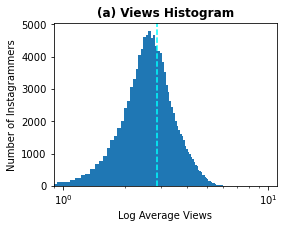

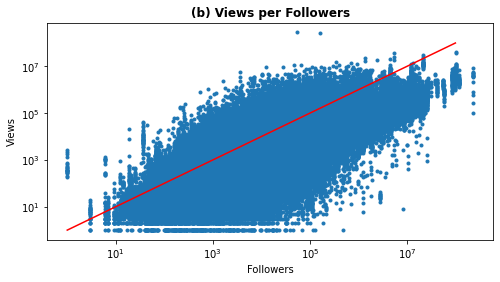

Text(42.248515624999996, 0.5, 'Views')

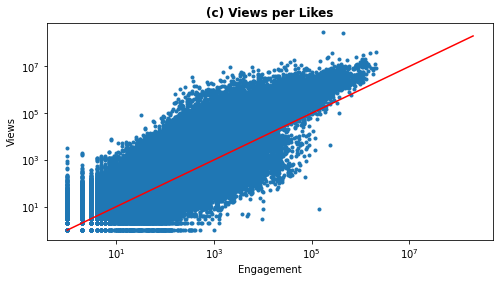

In [78]:
#figure (a)
views_log = np.log10(usersData["avg_views"])
print("Mean views from Log Average Views: ", round(float(format(10**(views_log.mean()))),2))
print("Paper mean views from Log Average Views: 748.00")
plt.figure(figsize=[4,3])
plt.hist(views_log,bins=100)
plt.axvline(x=views_log.mean(),linestyle='--',color='cyan')
plt.xscale("log")
plt.xlim(left=0.9,right=11)
plt.xlabel("Log Average Views")
plt.ylabel("Number of Instagrammers")
plt.title("(a) Views Histogram", fontweight="bold")
plt.savefig('./Views_Histogram.jpg')
plt.show()

#figure(b)
plt.figure(figsize=(8,4))
plt.plot(followers_views["followers"],followers_views["views"],".")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Followers")
plt.ylabel("Views")
plt.plot([1,10**8],[1,10**8],"r-")
plt.title("(b) Views per Followers", fontweight="bold")
plt.savefig('./Views_per_Followers.jpg')
plt.show()

#figure(c)
plt.figure(figsize=(8,4))
plt.plot(likes_views["likes"],likes_views["views"],".")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Engagement")
plt.plot([1,2*10**8],[1,2*10**8],"r-")
plt.title("(c) Views per Likes", fontweight="bold")
plt.savefig('./Views_per_Likes.jpg')
plt.ylabel("Views")

Figure (a) shows that this statistic behaves in a log-normal distribution.

### Remove Outliers

### Add Features

In [79]:
usersData = pd.read_csv('usersData.csv')
usersData['sqrt(followers*likes)'] = np.sqrt(usersData['avg_followers']*usersData['avg_likes'])
usersData['followers/post'] = usersData['avg_followers']/usersData['avg_posts']
usersData['comments/likes'] = usersData['avg_comments']/usersData['avg_likes']
usersData['focus_diff_engmnt'] = usersData['max_likes']-usersData['min_likes']
usersData['focus_ratio_engmnt'] = usersData['min_likes']/usersData['max_likes']
usersData.head()

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views,sqrt(followers*likes),followers/post,comments/likes,focus_diff_engmnt,focus_ratio_engmnt
0,97.50,3.00,13178.0,1967.0,113,59,333.1667,1133.514446,6.699542,0.030769,54,0.522124
1,91.75,9.25,4228.0,1402.0,174,39,308.6250,622.831438,3.015692,0.100817,135,0.224138
2,33.00,3.50,2212.0,2471.0,46,23,126.7500,270.177719,0.895184,0.106061,23,0.500000
3,20.00,3.50,203.0,1838.0,26,16,65.5000,63.718129,0.110446,0.175000,10,0.615385
4,13.20,1.20,132.0,309.0,18,9,61.2000,41.742065,0.427184,0.090909,9,0.500000


## Regression models (R<sup>2</sup> and r<sub>s</sub> statistics)

The target attribute "Influence of Instagrammer" is defined as the mean (or average) views per Instagrammer.

### Compute Baselines
#### Followers Baseline Regression

In [29]:
print("Paper R2: 0.211")
print("Paper rs: 0.757")

Paper R2: 0.211
Paper rs: 0.757


#### Likes Baseline Regression

In [30]:
print("Paper R2: 0.666")
print("Paper rs: 0.859")

Paper R2: 0.666
Paper rs: 0.859


#### Followers Baseline Multi-Regression

In [31]:
print("Paper R2: 0.204")
print("Paper rs: 0.725")

Paper R2: 0.204
Paper rs: 0.725


#### Likes Baseline Multi-Regression

In [32]:
print("Paper R2: 0.654")
print("Paper rs: 0.853")

Paper R2: 0.654
Paper rs: 0.853


### Regression
#### Full Ridge Regression

In [33]:
print("Paper R2: 0.752")
print("Paper rs: 0.848")

Paper R2: 0.752
Paper rs: 0.848


#### Full Random Forest Regression

In [34]:
print("Paper R2: 0.626")
print("Paper r2: 0.869")

Paper R2: 0.626
Paper r2: 0.869


### Multiregression
#### Full Ridge Multi-Regression

In [36]:
print("Paper R2: 0.727")
print("Paper rs: 0.821")

Paper R2: 0.727
Paper rs: 0.821


#### Full Random Forest Multi-Regression

In [35]:
print("Paper R2: 0.621")
print("Paper rs: 0.861")

Paper R2: 0.621
Paper rs: 0.861


### Recursive Feature Elimination
#### Minimal Ridge Regression

In [38]:
print("Paper R2: 0.723")
print("Paper rs: 0.818")

Paper R2: 0.723
Paper rs: 0.818


#### Minimal Random Forest Regression

In [37]:
print("Paper R2: 0.616")
print("Paper rs: 0.864")

Paper R2: 0.611
Paper rs: 0.859


#### Minimal Ridge Multi-Regression

In [ ]:
print("Paper R2: 0.727")
print("Paper r2: 0.818")

#### Minimal Random Forest Multi-Regression

In [39]:
print("Paper R2: 0.611")
print("Paper rs: 0.859")

Paper R2: 0.611
Paper rs: 0.859
